**Foreword**<br><br>
Inspired by Google PageRank, it is also possible to linearize the high dimensional stock data set by solving the Eigen Vectors.<br>
Here illustrate how Eigen Vector helps PageRank problem.<br>
https://www.intmath.com/matrices-determinants/8-applications-eigenvalues-eigenvectors.php<br>
<br>
**Principal Component Analysis**<br><br>
In PCA, variance of a n-dimensional data set can be represented by n Eigen Vectors (EVec).<br>
Reference for Eigen Vector.<br>
http://mathworld.wolfram.com/Eigenvalue.html<br>

Similarly, supposed we have n stocks in the portfolio. There are n EVec to explain their variance.<br>
The EVec with the largest Eigen Value (EVal) explains the variance the most, and so on.<br>

**Short notes for Eigen Decomposition**<br><br>
Since different stock prices are not on the same scale, the covariance matrix $\Sigma$ should be used.<br>
After Eigen decomposition of $\Sigma$ ,we can find the set of EVec and Eval.<br><br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$\Sigma$ = $Q$&ensp;$V$&ensp;$Q^T$<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; where $Q$ consists of EVec, and diagonal matrix $V$ contains EVal.<br>

The EVec is then divided by sum of its elements, to get the stocks weight.<br>

**How many EVec we need?**<br><br>
If the sum the first n largest EVal =0.9, it means 90% of variance can be explained by that n EVec.<br>

The below function returns that n EVec.

In [ ]:
# find eigen vectors that explain more than threshold% of variation
def eigen_weight(cov,threshold):
    E_Val, E_Vec = np.linalg.eigh(cov)   # E_Val = Variances of  n stocks
    
    start=0
    for i in range(len(E_Val)):
        start += E_Val[-i-1]/sum(E_Val)
        if start >= threshold:
            w = E_Vec[:,-i-1:]/sum(E_Vec[:,-i-1:]) # divided by sum of vector to get weight
            return np.flip(w,axis=1)               # flip to make first column correspond to the largest eigen value
            break

**Testing with US stocks**<br><br>
The code below compares different allocation objectives: <br>
1. Minimize Variance
2. Maximize Sharpe Ratio
3. Eigen weights

Please refer 
https://github.com/lauwo711/Portfolio-Optimization/blob/master/Portfolio-Optimization.ipynb <br>
for some functions below.

In [1]:
# metrics      
portfolio = ['WMT','AMZN','T','V','TSLA','MSFT','UNH','JPM','CAT','PG'] 
px = get_price(portfolio,5)
returns, cov, corr = hist_return_cov_corr(px)

# find weight
eigen_w = eigen_weight(cov,0.9)

# display all optimal weights in a dataframe
weight_table = pd.DataFrame(data= min_var_w_LM, columns = ['min_var_weight_LM'], index = portfolio)
weight_table['min_var_weight_no_ss'] = min_var_w_no_ss
weight_table['max_sharpe_weight_no_ss'] = max_sharpe_w_no_ss

for i in range(np.size(eigen_w,1) ):
    weight_table['eigen_' + str(i+1)] = eigen_w[:,i]

#print
weight_table.style.format("{:.1%}")

[*********************100%***********************]  10 of 10 completed


,min_var_weight_LM,min_var_weight_no_ss,max_sharpe_weight_no_ss,eigen_1,eigen_2,eigen_3,eigen_4,eigen_5,eigen_6,eigen_7
WMT,14.5%,14.3%,6.5%,4.8%,9.7%,37.9%,68.2%,173.8%,403.9%,-265.7%
AMZN,2.8%,1.3%,16.5%,13.6%,24.1%,-126.9%,-17.4%,47.4%,925.1%,13.4%
T,21.8%,22.1%,10.8%,4.2%,11.3%,46.1%,29.0%,102.1%,612.9%,364.4%
V,9.7%,7.9%,11.0%,9.6%,17.3%,-16.4%,9.2%,-1.2%,-1048.6%,-2.8%
TSLA,0.5%,0.5%,0.9%,26.5%,-53.1%,9.8%,0.7%,-5.7%,31.0%,7.0%
MSFT,-5.3%,0.0%,1.7%,11.4%,22.2%,-34.3%,5.4%,11.5%,-1019.0%,-4.3%
UNH,11.1%,10.8%,15.5%,7.0%,16.8%,19.2%,56.6%,-288.7%,567.0%,-36.6%
JPM,8.2%,7.5%,12.7%,8.3%,18.5%,54.4%,-9.0%,-52.9%,-466.5%,88.6%
CAT,-0.0%,0.0%,0.0%,10.7%,24.5%,90.9%,-77.8%,19.3%,476.8%,-114.6%
PG,36.5%,35.7%,24.4%,3.9%,8.7%,19.3%,35.1%,94.3%,-382.5%,50.6%


**Cummulative return for different allocation objectives**<br>

The code below plots the performance.<br>

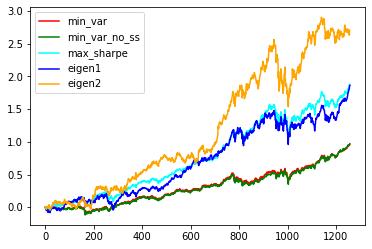

In [21]:
# plot cummulative return using diff weights
cum_r = cum_returns(px)
min_var_w_LM_r = portfolio_return(min_var_w_LM,cum_r)
min_var_w_no_ss_r = portfolio_return(min_var_w_no_ss,cum_r)
max_sharpe_w_no_ss_r = portfolio_return(max_sharpe_w_no_ss,cum_r)
eigen_w_1_r = portfolio_return(eigen_w[:,0],cum_r)
eigen_w_2_r = portfolio_return(eigen_w[:,1],cum_r)

plt.plot(min_var_w_LM_r, color='red', label="min_var")
plt.plot(min_var_w_no_ss_r, color='green', label="min_var_no_ss")
plt.plot(max_sharpe_w_no_ss_r, color='cyan', label="max_sharpe")
plt.plot(eigen_w_1_r, color='blue', label="eigen1")
plt.plot(eigen_w_2_r, color='orange', label="eigen2")
plt.legend(loc="upper left")

**Summary**<br>
The EVec with the largest Eval (Eigen1) have similar performance with Max_Sharpe.<br>
Surprisingly, EVec with the 2nd largest Eval(Eigen2) outperform Eigen1, almost all the time. But also experienced greater volatility than Eigen1.<br>
Comparing Eigen2 and Eigen1, there are 2 main differences:<br>
1. Eigen2 double the weights of Eigen1, except TSLA.
2. Eigen2 shorts stock (TSLA) but Eigen1 does not.

These 2 features make the difference for Eigen2.